Projet ARF - inpainting

In [13]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

Préambule

In [14]:
def load_usps(fn):
    with open(fn,"r") as f:
        f.readline()
        data = [[float(x) for x in l.split()] for l in f if len(l.split())>2]
    tmp=np.array(data)
    return tmp[:,1:],tmp[:,0].astype(int)

def show_usps(data):
    plt.imshow(data.reshape((16,16)),interpolation="nearest",cmap="gray")

In [15]:
X_train, y_train = load_usps("USPS_train.txt")
X_test, y_test = load_usps("USPS_test.txt")

In [16]:
lr = LinearRegression()
ri = Ridge()
la = Lasso()

In [12]:
print("Comparison of accuracies")
cv=4
print("Linear Regression : ",100*sum(cross_val_score(lr,X_train,y_train,cv=cv))/cv,"%")
print("Ridge Regression : ",100*sum(cross_val_score(ri,X_train,y_train,cv=cv))/cv,"%")
print("Lasso Regression : ",100*sum(cross_val_score(la,X_train,y_train,cv=cv))/cv,"%")

Comparison of accuracies
Linear Regression :  61.5814945149657 %
Ridge Regression :  61.61453095733869 %
Lasso Regression :  8.632338794405337 %


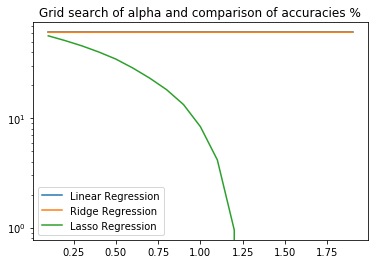

In [26]:
x = []
cv=3
y_lr = []
y_ri = []
y_la = []
for i in range(1,20):
    xx = i/10
    lr = LinearRegression()
    ri = Ridge(alpha=xx)
    la = Lasso(alpha=xx)
    x.append(xx)
    y_lr.append(100*sum(cross_val_score(lr,X_train,y_train,cv=cv))/cv)
    y_ri.append(100*sum(cross_val_score(ri,X_train,y_train,cv=cv))/cv)
    y_la.append(100*sum(cross_val_score(la,X_train,y_train,cv=cv))/cv)
plt.plot(x,y_lr,label="Linear Regression")
plt.plot(x,y_ri,label="Ridge Regression")
plt.plot(x,y_la,label="Lasso Regression")
plt.title("Grid search of alpha and comparison of accuracies %")
plt.yscale('log')
plt.legend()